In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

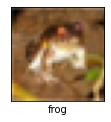

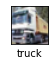

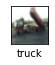

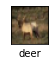

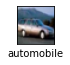

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i])
 plt.xlabel(class_names[train_labels[i][0]])
 plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.5630 - accuracy: 0.4316 - val_loss: 1.2828 - val_accuracy: 0.5375
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.2123 - accuracy: 0.5699 - val_loss: 1.1365 - val_accuracy: 0.5955
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.0607 - accuracy: 0.6265 - val_loss: 1.0193 - val_accuracy: 0.6425
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9603 - accuracy: 0.6626 - val_loss: 0.9651 - val_accuracy: 0.6627
Epoch 5/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.8924 - accuracy: 0.6869 - val_loss: 0.9353 - val_accuracy: 0.6760
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8289 - accuracy: 0.7093 - val_loss: 0.9487 - val_accuracy: 0.6712
Epoch 7/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7788 - accuracy: 0.7269 - val_loss: 0.9073 -

313/313 - 5s - loss: 0.8698 - accuracy: 0.7102 - 5s/epoch - 15ms/step


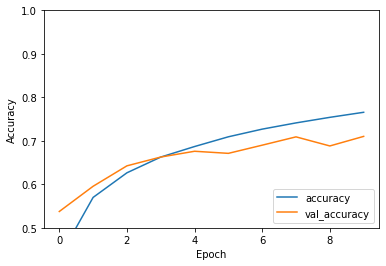

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)